In [1]:
import cv2
import os
import matplotlib.pyplot as plt

%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lmb8ipm0 because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Illustrate RGB diffs

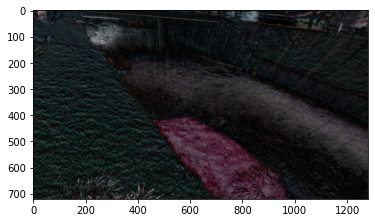

In [3]:
# Load two images
img1 = cv2.imread('/enoe/2020/11/26/20201126_174127-SHOP2.jpg')
img2 = cv2.imread('/enoe/2020/11/26/20201126_174720-SHOP2.jpg')

# Compute the difference between the two images
diff = cv2.absdiff(img1, img2)

cv2.imwrite('prev.jpg', img1)
cv2.imwrite('next.jpg', img2)
cv2.imwrite('diff.jpg', diff)

# Show the difference image
plt.imshow(diff)
plt.show()

# Automate RGB diffs computation

In [3]:
enoe_dir = '/enoe'
csv_path = '../resources/flood_images_annot.csv'
csv_rgbdiffs_path = '../resources/flood_rgbdiffs_annot.csv'
rgbdiffs_dir = '/rgbdiffs'

os.makedirs(rgbdiffs_dir, exist_ok=True)

In [4]:
import enoe_utils
import pandas as pd

# Load images dataframe
df = enoe_utils.load_df(csv_path, place='SHOP')
# Remove "bad" images (annotated as zero)
df = df[ df['level']!=0 ]
df.head()

,datetime,place,path,level
33842,2018-11-01 00:00:58,SHOP,2018/11/01/20181101_000058-SHOP.jpg,1.0
33844,2018-11-01 00:17:22,SHOP,2018/11/01/20181101_001722-SHOP.jpg,1.0
33847,2018-11-01 00:33:51,SHOP,2018/11/01/20181101_003351-SHOP.jpg,1.0
33849,2018-11-01 00:50:03,SHOP,2018/11/01/20181101_005003-SHOP.jpg,1.0
33851,2018-11-01 01:06:17,SHOP,2018/11/01/20181101_010617-SHOP.jpg,1.0


In [10]:
prev_row = None
prev_img = None
rgbdiffs_df_rows = list()

# Iterrate all rows
for i, (index, row) in enumerate(df.iterrows()):
    # Read image given in the current row
    img = cv2.imread(os.path.join(enoe_dir,row['path']))
    if img is None:
        continue
    # Check if this is not the first image
    if prev_img is not None:
        # Check if the last image was taken less than 20 minutes ago
        time_diff = (row['datetime'] - prev_row['datetime']).seconds//60
        if time_diff < 20:
            # Compute optical rgbdiff, convert it into an image, and store it
            rgbdiff_img = cv2.absdiff(prev_img, img)
            dir_name = os.path.dirname(os.path.join(rgbdiffs_dir, row['path']))
            os.makedirs(dir_name, exist_ok=True)
            path = row['path']
            cv2.imwrite(os.path.join(rgbdiffs_dir, path), rgbdiff_img)
            # Generate row for the new dataframe
            # New level = maximum level between the two frames
            new_lvl = max(row['level'], prev_row['level'])
            rgbdiffs_df_rows.append([row['datetime'],
                                     row['place'],
                                     prev_row['path'],
                                     row['path'],
                                     path,
                                     prev_row['level'],
                                     row['level']])
    # Update prev variables
    prev_row = row
    prev_img = img
    # Show "alive" message every 500 iterations
    if not i%500:
        print(i, row)
    # Halt after 1000 iterations
    #if i==1000:
    #    break
# Generate dataframe
df_new = pd.DataFrame(rgbdiffs_df_rows, columns=['datetime',
                                                 'place',
                                                 'path_prev',
                                                 'path_next',
                                                 'path',
                                                 'level_prev',
                                                 'level_next'])
df_new.to_csv(csv_rgbdiffs_path)

0 datetime                    2018-11-01 00:00:58
place                                      SHOP
path        2018/11/01/20181101_000058-SHOP.jpg
level                                       1.0
Name: 33842, dtype: object
500 datetime                    2018-11-06 12:31:58
place                                      SHOP
path        2018/11/06/20181106_123158-SHOP.jpg
level                                       1.0
Name: 34882, dtype: object
1000 datetime                    2018-11-12 04:49:29
place                                      SHOP
path        2018/11/12/20181112_044929-SHOP.jpg
level                                       1.0
Name: 35925, dtype: object
1500 datetime                    2018-11-17 21:54:33
place                                      SHOP
path        2018/11/17/20181117_215433-SHOP.jpg
level                                       1.0
Name: 37007, dtype: object
2000 datetime                    2018-11-23 13:19:33
place                                      SHOP
path   

18500 datetime                     2020-11-23 15:59:01
place                                      SHOP2
path        2020/11/23/20201123_155901-SHOP2.jpg
level                                        1.0
Name: 215662, dtype: object
19000 datetime                     2020-11-25 19:00:05
place                                      SHOP2
path        2020/11/25/20201125_190005-SHOP2.jpg
level                                        1.0
Name: 216692, dtype: object
19500 datetime                     2020-11-27 22:55:53
place                                      SHOP2
path        2020/11/27/20201127_225553-SHOP2.jpg
level                                        1.0
Name: 217732, dtype: object
20000 datetime                     2020-11-30 01:57:21
place                                      SHOP2
path        2020/11/30/20201130_015721-SHOP2.jpg
level                                        1.0
Name: 218693, dtype: object
20500 datetime                     2020-12-02 05:30:09
place                    

36500 datetime                     2021-02-11 10:59:57
place                                      SHOP2
path        2021/02/11/20210211_105957-SHOP2.jpg
level                                        1.0
Name: 239336, dtype: object
37000 datetime                     2021-02-13 14:48:26
place                                      SHOP2
path        2021/02/13/20210213_144826-SHOP2.jpg
level                                        1.0
Name: 239843, dtype: object
37500 datetime                     2021-02-15 18:30:38
place                                      SHOP2
path        2021/02/15/20210215_183038-SHOP2.jpg
level                                        1.0
Name: 240344, dtype: object
38000 datetime                     2021-02-18 00:35:24
place                                      SHOP2
path        2021/02/18/20210218_003524-SHOP2.jpg
level                                        1.0
Name: 240844, dtype: object
38500 datetime                     2021-02-20 03:44:06
place                    

54500 datetime                     2021-12-30 11:05:47
place                                      SHOP2
path        2021/12/30/20211230_110547-SHOP2.jpg
level                                        1.0
Name: 367362, dtype: object
55000 datetime                     2022-01-01 13:58:55
place                                      SHOP2
path        2022/01/01/20220101_135855-SHOP2.jpg
level                                        1.0
Name: 368386, dtype: object
55500 datetime                     2022-01-03 16:24:43
place                                      SHOP2
path        2022/01/03/20220103_162443-SHOP2.jpg
level                                        1.0
Name: 369384, dtype: object
56000 datetime                     2022-01-05 19:23:41
place                                      SHOP2
path        2022/01/05/20220105_192341-SHOP2.jpg
level                                        1.0
Name: 370407, dtype: object
56500 datetime                     2022-01-07 23:43:52
place                    